In [3]:
import xarray as xr

# Example path – replace with your actual file path
path = "/Datastorage/mihir.more/gencast-gfs-run-20251129-sst/gc_gfs_12.grib2"

ds = xr.open_dataset(
    path,
    engine="cfgrib",
)

print(ds)


<xarray.Dataset> Size: 3GB
Dimensions:        (number: 10, latitude: 721, longitude: 1440,
                    isobaricInhPa: 13)
Coordinates:
  * number         (number) int64 80B 1 2 3 4 5 6 7 8 9 10
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * isobaricInhPa  (isobaricInhPa) float64 104B 1e+03 925.0 850.0 ... 100.0 50.0
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
    valid_time     datetime64[ns] 8B ...
Data variables:
    tp             (number, latitude, longitude) float32 42MB ...
    t2m            (number, latitude, longitude) float32 42MB ...
    msl            (number, latitude, longitude) float32 42MB ...
    u10            (number, latitude, longitude) float32 42MB ...
    v10            (number, latitude, longitude) float32 42MB ...
    t              (number, isobaricInhPa, latitude, 

In [ ]:
tp = ds["tp"]  

print(tp.dims)
print(tp.coords)


('number', 'latitude', 'longitude')
Coordinates:
  * number      (number) int64 80B 1 2 3 4 5 6 7 8 9 10
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ...


In [5]:
tp_mean = tp.mean(dim="number")
tp_std  = tp.std(dim="number")
print(tp_mean)
print(tp_std)

threshold = 0.05  # 50 mm if units are meters of accumulated rain
prob_heavy = (tp > threshold).mean(dim="number")


<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)> Size: 4MB
array([[4.9661681e-05, 4.9838261e-05, 5.0000683e-05, ..., 4.9863593e-05,
        4.9981310e-05, 4.9990253e-05],
       [5.7518318e-05, 5.7553338e-05, 5.7399109e-05, ..., 5.7678506e-05,
        5.7794736e-05, 5.7600275e-05],
       [6.6365137e-05, 6.6134919e-05, 6.6138644e-05, ..., 6.6593871e-05,
        6.6451568e-05, 6.6359178e-05],
       ...,
       [1.8796161e-05, 1.8901959e-05, 1.8903451e-05, ..., 1.8521236e-05,
        1.8824474e-05, 1.8606917e-05],
       [2.4714158e-05, 2.4871366e-05, 2.4818466e-05, ..., 2.4466053e-05,
        2.4591969e-05, 2.4410174e-05],
       [4.0211366e-05, 4.0200935e-05, 4.0221796e-05, ..., 4.0169642e-05,
        4.0140585e-05, 4.0417748e-05]], dtype=float32)
Coordinates:
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    time        datetime64[ns] 8B ...
    step        timedel

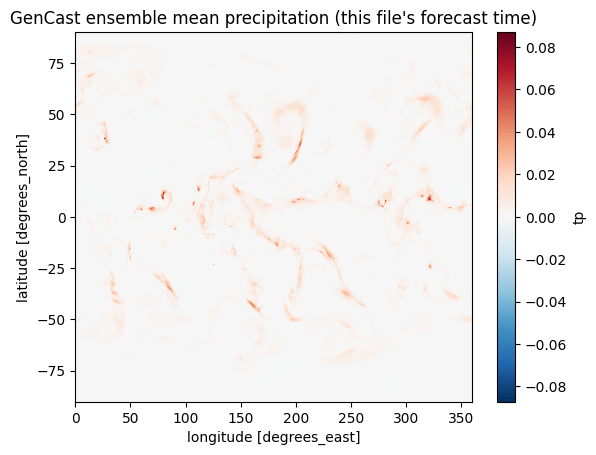

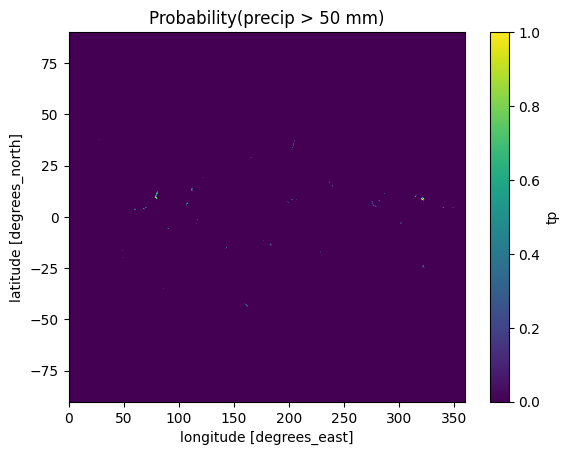

In [6]:
import matplotlib.pyplot as plt

plt.figure()
tp_mean.plot()
plt.title("GenCast ensemble mean precipitation (this file's forecast time)")
plt.show()

plt.figure()
prob_heavy.plot()
plt.title("Probability(precip > 50 mm)")
plt.show()


In [7]:
print(tp.coords.get("valid_time"))
print(tp.coords.get("step"))

<xarray.DataArray 'valid_time' ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ...
Attributes:
    standard_name:  time
    long_name:      time
<xarray.DataArray 'step' ()> Size: 8B
[1 values with dtype=timedelta64[ns]]
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period


In [8]:
print("Dims:", ds.dims)
print("Coords:", list(ds.coords))


Dims: FrozenMappingWarningOnValuesAccess({'number': 10, 'latitude': 721, 'longitude': 1440, 'isobaricInhPa': 13})
Coords: ['number', 'time', 'step', 'surface', 'latitude', 'longitude', 'valid_time', 'isobaricInhPa']


In [9]:
print("Init time (model run time):", ds["time"].values)
print("Lead time (forecast step):", ds["step"].values)
print("Valid time (this field is for):", ds["valid_time"].values)


Init time (model run time): 2025-11-29T06:00:00.000000000
Lead time (forecast step): 43200000000000 nanoseconds
Valid time (this field is for): 2025-11-29T18:00:00.000000000


In [ ]:
import xarray as xr

# Example path – replace with your actual file path
path = "/tmp/ai-models-gfs/gfssfcformatted_20251128_18.grib"

da = xr.open_dataset(
    path,
    engine="cfgrib",
)

print(da)

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/home/mihir.more/.local/lib/python3.11/site-packages/cfgrib/dataset.py", line 726, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/mihir.more/.local/lib/python3.11/site-packages/cfgrib/dataset.py", line 642, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='step' value=Variable(dimensions=(), data=0.0) new_value=Variable(dimensions=(), data=6.0)


<xarray.Dataset> Size: 42MB
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ...
Data variables:
    u100        (latitude, longitude) float32 4MB ...
    v100        (latitude, longitude) float32 4MB ...
    u10         (latitude, longitude) float32 4MB ...
    v10         (latitude, longitude) float32 4MB ...
    t2m         (latitude, longitude) float32 4MB ...
    z           (latitude, longitude) float32 4MB ...
    lsm         (latitude, longitude) float32 4MB ...
    msl         (latitude, longitude) float32 4MB ...
    sp          (latitude, longitude) float32 4MB ...
    tcwv        (latitude, longitude) float32 4MB ...
Attributes:
    GRIB

In [3]:
print("Init time (model run time):", da["time"].values)
print("Lead time (forecast step):", da["step"].values)
print("Valid time (this field is for):", da["valid_time"].values)


Init time (model run time): 2025-11-28T18:00:00.000000000
Lead time (forecast step): 0 nanoseconds
Valid time (this field is for): 2025-11-28T18:00:00.000000000


In [1]:
import xarray as xr

# Example path – replace with your actual file path
path = "/Datastorage/mihir.more/gencast-gfs-run-20251129-0000-sst/gc_gfs_12.grib2"

d = xr.open_dataset(
    path,
    engine="cfgrib",
)

print(d)

<xarray.Dataset> Size: 7GB
Dimensions:        (number: 20, latitude: 721, longitude: 1440,
                    isobaricInhPa: 13)
Coordinates:
  * number         (number) int64 160B 1 2 3 4 5 6 7 8 ... 14 15 16 17 18 19 20
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * isobaricInhPa  (isobaricInhPa) float64 104B 1e+03 925.0 850.0 ... 100.0 50.0
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
    valid_time     datetime64[ns] 8B ...
Data variables:
    tp             (number, latitude, longitude) float32 83MB ...
    t2m            (number, latitude, longitude) float32 83MB ...
    msl            (number, latitude, longitude) float32 83MB ...
    u10            (number, latitude, longitude) float32 83MB ...
    v10            (number, latitude, longitude) float32 83MB ...
    t              (number, isob

In [2]:
print("Init time (model run time):", d["time"].values)
print("Lead time (forecast step):", d["step"].values)
print("Valid time (this field is for):", d["valid_time"].values)


Init time (model run time): 2025-11-29T00:00:00.000000000
Lead time (forecast step): 43200000000000 nanoseconds
Valid time (this field is for): 2025-11-29T12:00:00.000000000


In [3]:
tp = d["tp"]
tp_mean = tp.mean(dim="number")
tp_std  = tp.std(dim="number")
print(tp_mean)
print(tp_std)

threshold = 0.05  # 50 mm if units are meters of accumulated rain
prob_heavy = (tp > threshold).mean(dim="number")


<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)> Size: 4MB
array([[4.6784618e-05, 4.6816655e-05, 4.6735815e-05, ..., 4.6677702e-05,
        4.6895631e-05, 4.6872534e-05],
       [5.3387321e-05, 5.3432399e-05, 5.3402597e-05, ..., 5.3413398e-05,
        5.3316169e-05, 5.3531119e-05],
       [5.3566509e-05, 5.3374657e-05, 5.3512118e-05, ..., 5.3594820e-05,
        5.3589978e-05, 5.3411164e-05],
       ...,
       [2.3600645e-05, 2.3554452e-05, 2.3466162e-05, ..., 2.3316406e-05,
        2.3436360e-05, 2.3395382e-05],
       [3.2442622e-05, 3.2411703e-05, 3.2438526e-05, ..., 3.2253003e-05,
        3.2483229e-05, 3.2240339e-05],
       [4.4091976e-05, 4.4172444e-05, 4.4211185e-05, ..., 4.3854678e-05,
        4.4110602e-05, 4.4102035e-05]], dtype=float32)
Coordinates:
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    time        datetime64[ns] 8B 2025-11-29
    step        

In [5]:
india = tp.sel(
    latitude=slice(35, 5),     # lat usually goes from north to south
    longitude=slice(65, 100),  # rough India box
)
